### Cho dữ liệu retail_transactions.csv, gồm các cột như sau:
    +InvoiceNo
    +StockCode
    +Description
    +Quantity
    +InvoiceDate
    +UnitPrice
    +CustomerID
    +Country
Thông tin cung cấp:
Trong dataset này có một số dữ liệu giao dịch lịch sử từ năm 2010 và 2011. Với mỗi giao dịch,
có customer identifier (CustomerID), số lượng hàng đã mua (Quantity), ngày mua
(InvoiceDate), đơn giá (Unitprice), và một số thông tin khác về mặt hàng đã mua.
Cần tiền xử lý dữ liệu này thành dữ liệu giao dịch của khách hàng từ năm 2010 so với chi tiêu
năm 2011. Vì vậy, cần tạo ra các feature từ dữ liệu cho năm 2010 và tính toán mục tiêu (số
tiền đã chi) cho năm 2011.
Khi xây dựng tạo mô hình này, nó sẽ khái quát cho những năm tới. Nhờ đó, doanh nghiệp có
thể sử dụng dữ liệu năm 2020 để dự đoán trước hành vi chi tiêu vào năm 2021 (trừ khi thị
trường hoặc doanh nghiệp đã thay đổi đáng kể kể từ khoảng thời gian dữ liệu được sử dụng
để fit mô hình.

### Part 1: Hãy chuẩn hóa dữ liệu này và lưu vào tập tin wrangled_transactions.csv, gồm các thông tin như sau:
    +2010_revenue = Quantity * Unitprice where year(InvoiceDate) = 2010
    +days_since_first_purchase (to last day of month)
    +days_since_last_purchase (to last day of month)
    +number_of_purchases (in 2010)

### Part2: Hãy áp dụng thuật toán Linear Regression để xây dựng model dự đoán customer spend dựa vào dữ liệu wrangled_transactions.csv vừa có ở Part1. 
+ Đánh giá model.
+ Trực quan hóa kết quả.
+ Với '2010 revenue': [1000], 'days_since_last_purchase': [20], 'number_of_purchases': [2], 'avg_order_cost': [500] thì '2011 revenue' là bao nhiêu?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [46]:
retail = pd.read_csv('Data/retail_transactions.csv')
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom
...,...,...,...,...,...,...,...,...
397879,567380,23187,FRENCH STYLE STORAGE JAR BONBONS,48,2011-09-20 10:06:00,0.29,12620.0,France
397880,548154,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-03-29 13:06:00,0.55,17675.0,United Kingdom
397881,536381,21731,RED TOADSTOOL LED NIGHT LIGHT,2,2010-12-01 09:41:00,1.65,15311.0,United Kingdom
397882,557258,23039,T-LIGHT HOLDER SILVER HEART HANDLE,6,2011-06-19 10:35:00,1.95,12951.0,United Kingdom


In [47]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int64         
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 24.3+ MB


In [48]:
len(retail.CustomerID.unique())

4338

In [49]:
retail['Revenue'] = retail['UnitPrice']*retail['Quantity']
retail['Year'] = pd.to_datetime(retail['InvoiceDate']).apply(lambda x: x.year)
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom,15.00,2011
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom,7.50,2011
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom,20.40,2011
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom,11.80,2011
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom,16.50,2011
...,...,...,...,...,...,...,...,...,...,...
397879,567380,23187,FRENCH STYLE STORAGE JAR BONBONS,48,2011-09-20 10:06:00,0.29,12620.0,France,13.92,2011
397880,548154,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-03-29 13:06:00,0.55,17675.0,United Kingdom,13.20,2011
397881,536381,21731,RED TOADSTOOL LED NIGHT LIGHT,2,2010-12-01 09:41:00,1.65,15311.0,United Kingdom,3.30,2010
397882,557258,23039,T-LIGHT HOLDER SILVER HEART HANDLE,6,2011-06-19 10:35:00,1.95,12951.0,United Kingdom,11.70,2011


## Part 1: Hãy chuẩn hóa dữ liệu này và lưu vào tập tin wrangled_transactions.csv, gồm các thông tin như sau:
+ 2010_revenue = Quantity * Unitprice where year(InvoiceDate) = 2010
+ days_since_first_purchase (to last day of month)
+ days_since_last_purchase (to last day of month)
+ number_of_purchases (in 2010)

In [81]:
wrangled =  retail.pivot_table(values='Revenue', index='CustomerID', columns='Year', aggfunc="sum").dropna()
wrangled.columns = [f'revenue_{year}' for year in wrangled.columns]
wrangled

,revenue_2010,revenue_2011
CustomerID,,
12347.0,711.79,3598.21
12348.0,892.80,904.44
12370.0,1868.02,1677.67
12377.0,1001.52,626.60
12383.0,600.72,1249.84
...,...,...
18229.0,653.20,6623.70
18239.0,438.10,1123.51
18245.0,365.73,2201.33


In [82]:
import calendar

days_since_first_purchase = retail[retail['Year']==2010].groupby('CustomerID')['InvoiceDate'].min()
days_since_first_purchase.drop([i for i in days_since_first_purchase.index if i not in wrangled.index], axis=0, inplace=True)
days_since_first_purchase = days_since_first_purchase.apply(lambda x: calendar.monthrange(x.year, x.month)[1] - x.day - 1) #calculate days difference
#must subtract 1 day to exclude the current day

days_since_last_purchase = retail[retail['Year']==2010].groupby('CustomerID')['InvoiceDate'].max()
days_since_last_purchase.drop([i for i in days_since_first_purchase.index if i not in wrangled.index], axis=0, inplace=True)
days_since_last_purchase = days_since_last_purchase.apply(lambda x: calendar.monthrange(x.year, x.month)[1] - x.day - 1)
#must subtract 1 day to exclude the current day

num_of_purchases = retail[retail['Year']==2010].groupby('CustomerID')['InvoiceDate'].unique()
num_of_purchases = num_of_purchases.apply(lambda x: len(x))
num_of_purchases.drop([i for i in num_of_purchases.index if i not in wrangled.index], axis=0, inplace=True)

wrangled.insert(1, 'days_since_first_purchase', days_since_first_purchase)
wrangled.insert(2, 'days_since_last_purchase', days_since_last_purchase)
wrangled.insert(3, 'num_of_purchases', num_of_purchases)

wrangled

,revenue_2010,days_since_first_purchase,days_since_last_purchase,num_of_purchases,revenue_2011
CustomerID,,,,,
12347.0,711.79,23,23,1,3598.21
12348.0,892.80,14,14,1,904.44
12370.0,1868.02,16,13,2,1677.67
12377.0,1001.52,10,10,1,626.60
12383.0,600.72,8,8,1,1249.84
...,...,...,...,...,...
18229.0,653.20,29,22,2,6623.70
18239.0,438.10,28,28,1,1123.51
18245.0,365.73,11,11,1,2201.33


## Part2: Hãy áp dụng thuật toán Linear Regression để xây dựng model dự đoán customer spend dựa vào dữ liệu wrangled_transactions.csv vừa có ở Part1. 

+ Đánh giá model.
+ Trực quan hóa kết quả.
+ Với '2010 revenue': [1000], 'days_since_last_purchase': [20], 'number_of_purchases': [2], 'avg_order_cost': [500] thì '2011 revenue' là bao nhiêu?

------------ revenue_2010 -------------------


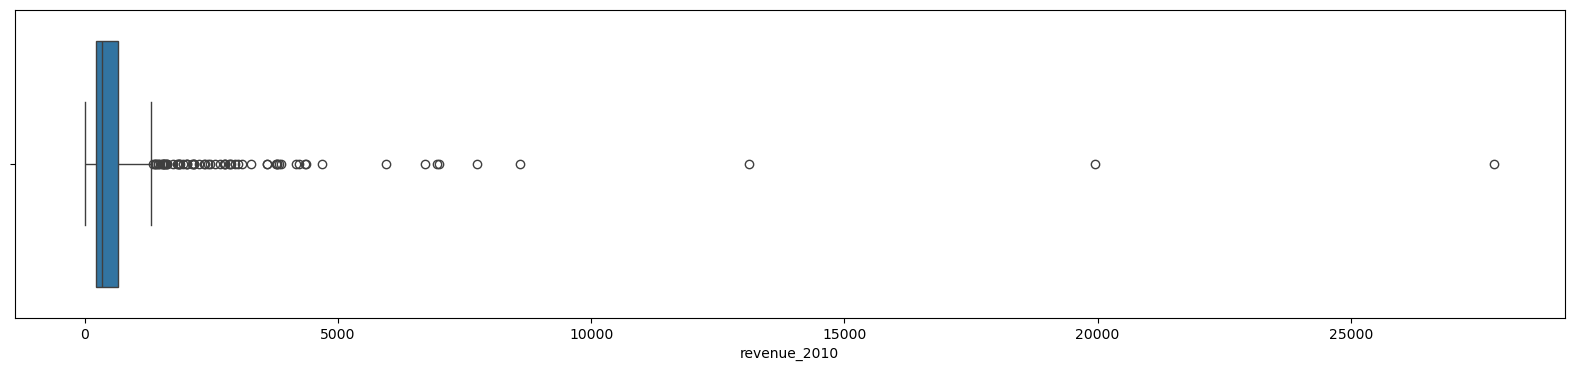


------------ days_since_first_purchase -------------------


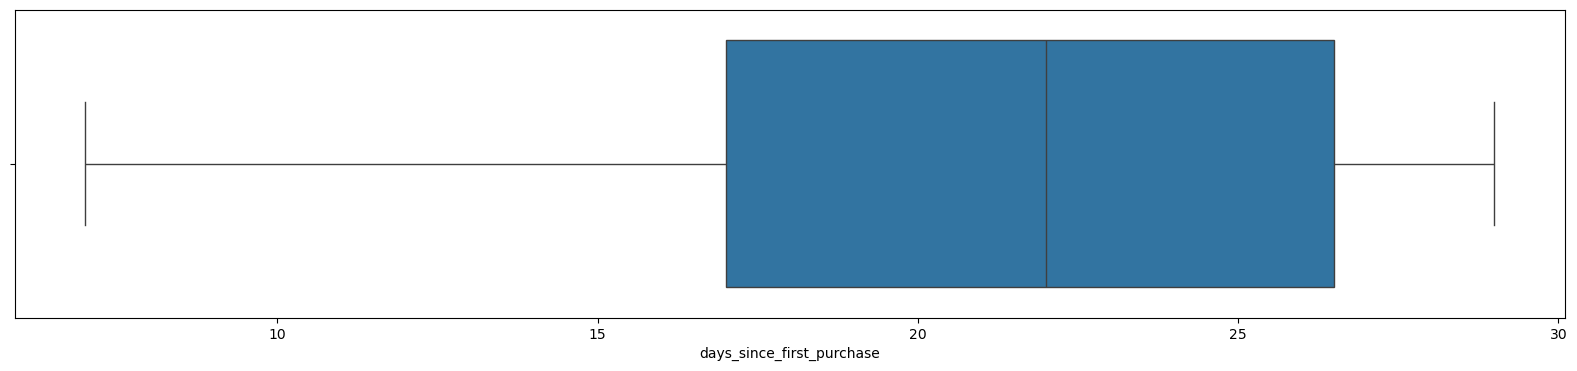


------------ days_since_last_purchase -------------------


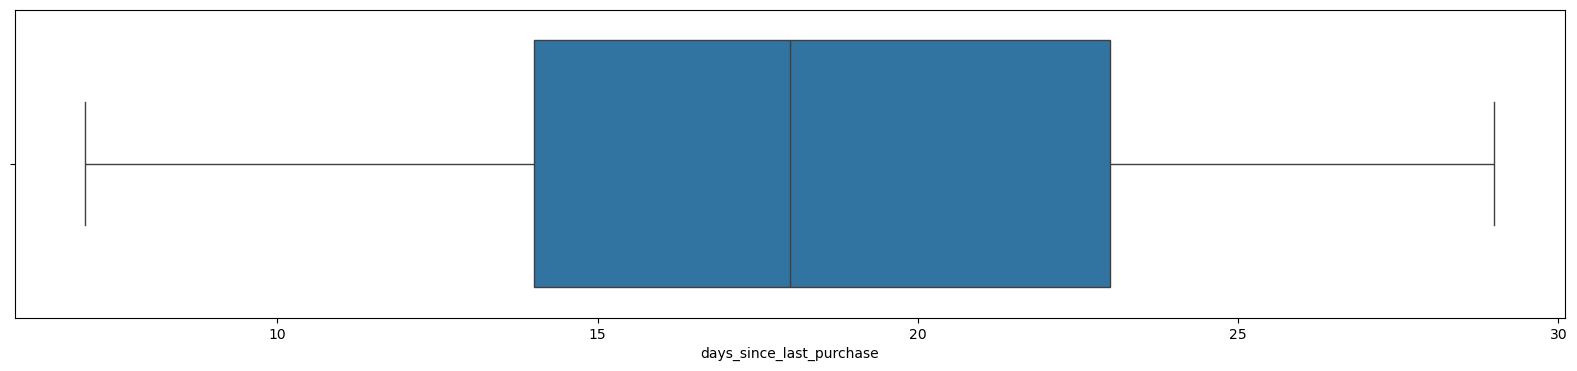


------------ num_of_purchases -------------------


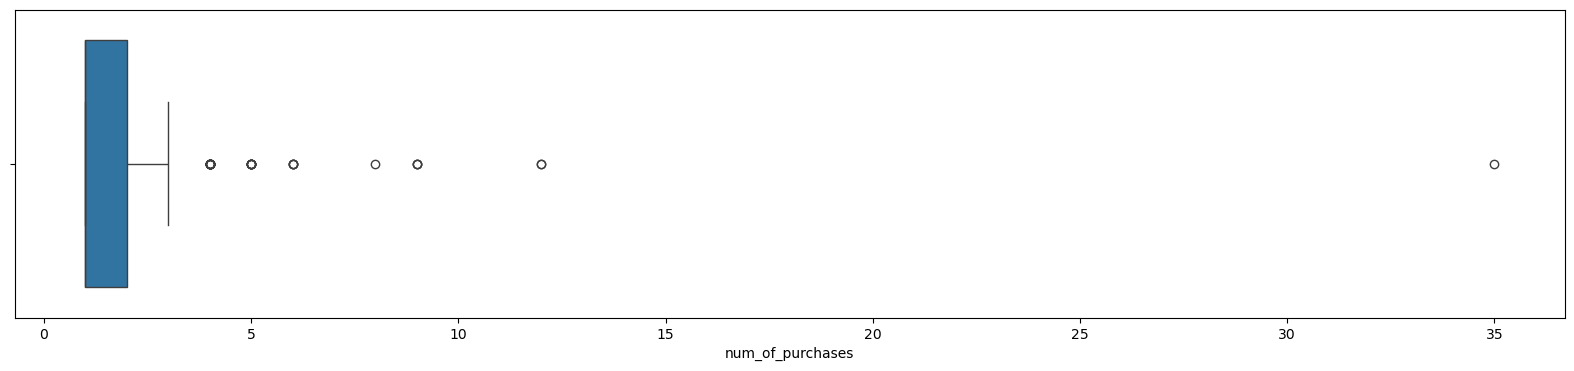


------------ revenue_2011 -------------------


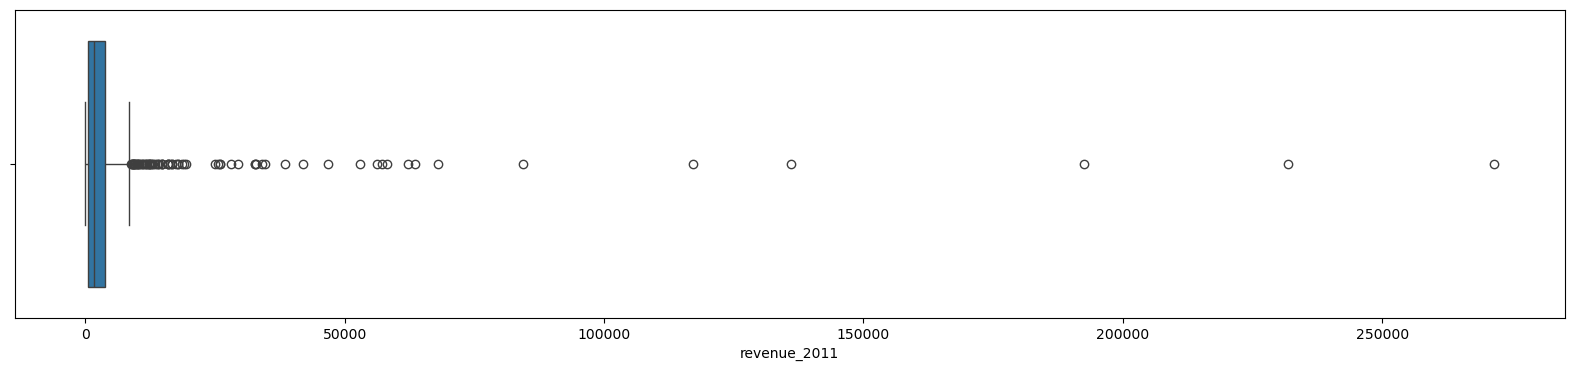

In [88]:
for col in wrangled.columns:
    print(f'------------ {col} -------------------')
    plt.figure(figsize=(20,4))
    sbn.boxplot(wrangled[col], orient='h')
    plt.show()
    print()

### Too much outliers => use RobustScaler

In [89]:
x = wrangled.drop('revenue_2011', axis=1)
y = wrangled['revenue_2011']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [93]:
from sklearn.linear_model import LinearRegression
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

R^2 score (accuracy) on whole set: 0.42212461551706504
R^2 score (accuracy) on train set: 0.42798205291111324
R^2 score (accuracy) on test set: 0.3827829343725455

MSE on test set: 124177543.47073133
MAE on test set: 4290.126055117605



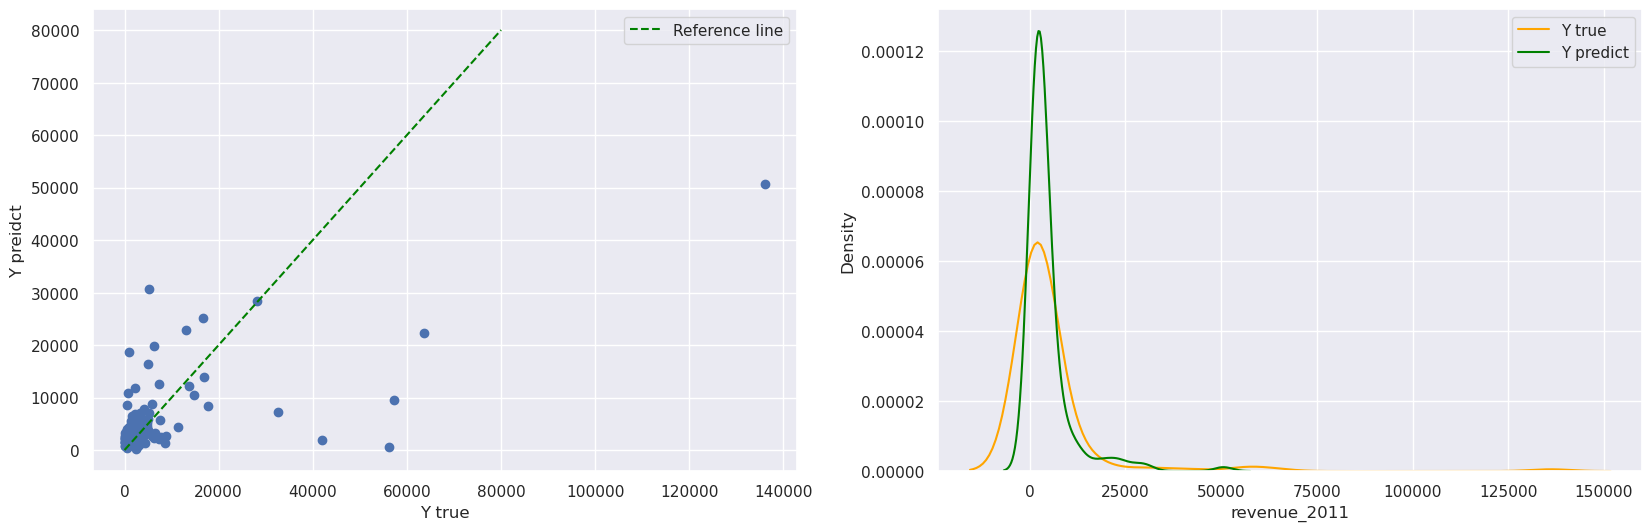

In [113]:
linreg_pipe = Pipeline([
    ('Robust_scaling', RobustScaler()),
    ('Linear_regression', LinearRegression())
])

linreg_pipe.fit(x_train, y_train)

y_pred = linreg_pipe.predict(x_test)

print(f'R^2 score (accuracy) on whole set: {linreg_pipe.score(x, y)}')
print(f'R^2 score (accuracy) on train set: {linreg_pipe.score(x_train, y_train)}')
print(f'R^2 score (accuracy) on test set: {linreg_pipe.score(x_test, y_test)}')
print()
print(f'MSE on test set: {mean_squared_error(y_test, y_pred)}')
print(f'MAE on test set: {mean_absolute_error(y_test, y_pred)}')
print()

plt.figure(figsize=(20,6))
sbn.set_theme(style='darkgrid')

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred)
plt.plot([0,80000], [0,80000], '--', label='Reference line', color='green')
plt.xlabel('Y true')
plt.ylabel('Y preidct')
plt.legend()

plt.subplot(1,2,2)
sbn.kdeplot(y_test, color='orange', label='Y true')
sbn.kdeplot(y_pred, color='green', label='Y predict')
plt.legend()
plt.show()

## The results are bad: R^2 score very low (<0.5)
## The scatter plots do not lie near reference line
## The kde plots of Y true and Y predict do not overlap much